# We have dataset on customers of Ecommerce sites .We Wnat to predict the amount each of the customers spent yearly on the ecommerce sites

### Importing the Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action="ignore",category = FutureWarning)

### Reading the Dataset

In [14]:
df = pd.read_csv("Ecommerce Customers.csv")

In [10]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
df.shape

(500, 8)

In [28]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 141.1 KB


### Checking for missing values

### A jointplot creates 3 plots 
1. displaying both variables 
2. densityplot
3. relationship between both variables

In [38]:
# sns.jointplot(x="Time on Website",y = "Yearly Amount Spent",data = df)

In [40]:
# sns.jointplot(x="Time on App",y = "Yearly Amount Spent",data = df)

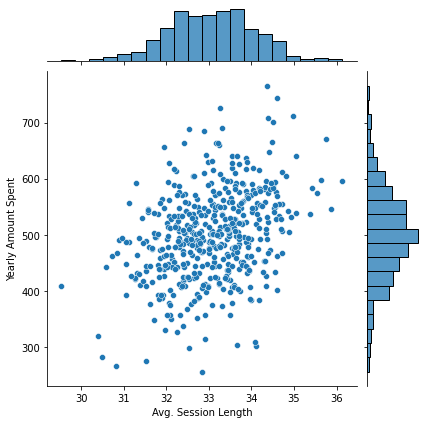

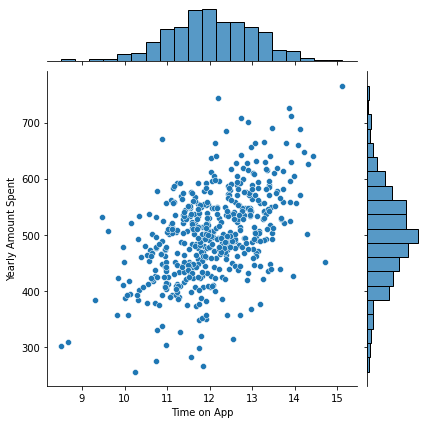

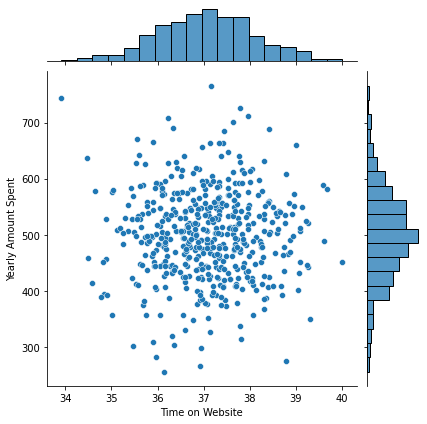

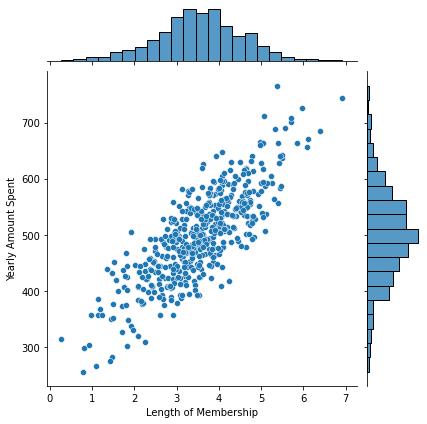

In [41]:
for i in df.columns[3:-1]:
    sns.jointplot(x=i,y = "Yearly Amount Spent",data = df)

In [42]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [45]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [46]:
X.shape

(500, 4)

In [23]:
y = df.iloc[:,-1]

In [24]:
y.shape

(500,)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
lm.coef_

array([25.69083176, 38.68815596,  0.45279908, 61.71050259])

In [53]:
predictions = lm.predict(X_test)

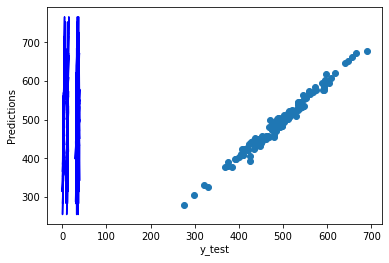

In [60]:
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("Predictions")
plt.show()